In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
import random
import random as rnd
import math

In [ ]:
FuncX = lambda x: x ** 2 * np.exp(np.sin(x))
x = np.random.uniform(-5, 5, size=[10000, 1])
x = x.reshape(10000)
x.sort()
x = x.reshape(10000, 1)
y = FuncX(x)
countOfHiddenNeuronsRBF = 7
countOfHiddenNeuronsPRC = 7
sigma=np.std(y)

In [ ]:
interpMtx = np.zeros((len(x), countOfHiddenNeuronsRBF))
centers = x[np.random.choice(len(x), countOfHiddenNeuronsRBF)]
def rbf(point, center):
    return np.exp(-np.linalg.norm((point - center) ** 2 / (2 * sigma ** 2)))
for i in range(len(x)):
        for j in range(len(centers)):
            interpMtx[i, j] = rbf(x[i], centers[j])
weightsRBF = np.linalg.pinv(interpMtx) @ y

def predictRBF(x):
    mtx = np.zeros((len(x), countOfHiddenNeuronsRBF))
    for i in range(len(x)):
        for j in range(len(centers)):
            mtx[i, j] = rbf(x[i], centers[j])
    return mtx @ weightsRBF
    
# RBF aproximation
print("RBF predict in 0:")
print(predictRBF([0]))
print("FuncX in 0:")
print(FuncX(0))

RBF predict in 0:
[[0.65457153]]
FuncX in 0:
0.0


In [ ]:
def logistic(x):
    return 1.0/(1 + np.exp(-x))

def logistic_deriv(x):
    return logistic(x) * (1 - logistic(x))

LR = 1   

I_dim = 1
H_dim = 7

epoch_count = 10

#np.random.seed(1)


weights_ItoH = np.random.uniform(-1, 1, (I_dim, H_dim))
weights_HtoO = np.random.uniform(-1, 1, H_dim)
preActivation_H = np.zeros(H_dim)
postActivation_H = np.zeros(H_dim)
def train1PRC(x, y):
    
    for epoch in range(epoch_count):
        print(str(epoch) + " / " + str(epoch_count))
        for sample in range(len(x)):
            for node in range(H_dim):
                preActivation_H[node] = np.dot(x[sample,:], weights_ItoH[:, node])
                postActivation_H[node] = (preActivation_H[node])
                
            preActivation_O = np.dot(postActivation_H, weights_HtoO)
            postActivation_O = preActivation_O
            
            FE = postActivation_O - y[sample]
            
            for H_node in range(H_dim):
                S_error = FE * logistic_deriv(preActivation_O)
                gradient_HtoO = S_error * postActivation_H[H_node]
                           
                for I_node in range(I_dim):
                    input_value = x[sample]
                    gradient_ItoH = S_error * weights_HtoO[H_node] * logistic_deriv(preActivation_H[H_node]) * input_value
                
                    weights_ItoH[I_node, H_node] -= LR * gradient_ItoH
                    
                weights_HtoO[H_node] -= LR * gradient_HtoO
          
def predict1PRC(x):
    results = []
    for sample in range(len(x)):
        for node in range(H_dim):
            preActivation_H[node] = np.dot(x[sample,:], weights_ItoH[:, node])
            postActivation_H[node] = preActivation_H[node]
                
        preActivation_O = np.dot(postActivation_H, weights_HtoO)
        results.append(preActivation_O)           
    return results

In [ ]:
train1PRC(x,y)  

0 / 10
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10


In [ ]:
def init_parameters(n_features, n_neurons, n_output):   
    np.random.seed(100)
    W1 = np.random.uniform(size=(n_features,n_neurons), low=-1.0, high=1.0)
    b1 = np.zeros(shape=(1,n_neurons))
    b1 += 1
    W2 = np.random.uniform(size=(n_neurons,n_output), low=-1.0, high=1.0)
    b2 = np.zeros(shape=(1,n_output))
    b2 += 1
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters
def linear_function(W, X, b):
    
    return (X @ W)+b
def sigmoid_function(Z):
    
    return 1/(1+np.exp(-Z))
def cost_function(A, y):
    
    return (np.mean(np.power(A - y,2)))/2
def predict2PRC(X, W1, W2, b1, b2):
    
    Z1 = linear_function(W1, X, b1)
    S1 = Z1
    Z2 = linear_function(W2, S1, b2)
    S2 = Z2
    return S2
def fit2PRC(X, y, n_features=1, n_neurons=7, n_output=1, iterations=10, eta=0.01):
    
    ## ~~ Initialize parameters ~~##
    param = init_parameters(n_features=n_features, 
                            n_neurons=n_neurons, 
                            n_output=n_output)

    ## ~~ storage errors after each iteration ~~##
    errors = []
    
    for _ in range(iterations):
        
        ##~~ Forward-propagation ~~##
        
        Z1 = linear_function(param['W1'], X, param['b1'])
        S1 = Z1
        Z2 = linear_function(param['W2'], S1, param['b2'])
        S2 = Z2
        
        ##~~ Error computation ~~##
        error = cost_function(S2, y)
        errors.append(error)
        
        ##~~ Backpropagation ~~##
        
        # update output weights
        delta2 = (S2 - y)*eta
        W2_gradients = S1.T @ delta2
        param["W2"] = param["W2"] - W2_gradients * eta

        # update output bias
        param["b2"] = param["b2"] - np.sum(delta2, axis=0, keepdims=True) * eta

        # update hidden weights
        delta1 = (delta2 @ param["W2"].T )*eta
        W1_gradients = X.T @ delta1 
        param["W1"] = param["W1"] - W1_gradients * eta

        # update hidden bias
        param["b1"] = param["b1"] - np.sum(delta1, axis=0, keepdims=True) * eta
        
    return errors, param

In [ ]:
errors, param = fit2PRC(x, y, iterations=5000, eta=0.001)
y_pred = predict2PRC(x, param["W1"], param["W2"], param["b1"], param["b2"])

In [ ]:
class Perceptron:
    def __init__(self, neurons):
        self.hidden_weights = np.zeros(neurons)
        self.hidden_biases = np.zeros(neurons)
        self.output_weights = np.zeros(neurons)
        self.hidden_outputs = np.zeros(neurons)
        self.neurons = neurons
        self.loss_list = list()

    def init_w(self):
        for i in range(self.neurons):
            self.hidden_weights[i] = rnd.random() - 0.5
            self.hidden_biases[i] = rnd.random() - 0.5
            self.output_weights[i] = rnd.random() - 0.5

    def activation(self, s, rounded: bool):
        if rounded:
            return 1 if 1 / (1 + math.exp(-s)) >= 0.5 else 0
        else:
            return 1 / (1 + math.exp(-s))

    def div(self, s):
        return self.activation(s, False) * (1 - self.activation(s, False))

    def predict(self, x):
        pred = 0
        self.hidden_outputs = np.zeros(self.neurons)
        for id in range(len(self.output_weights)):
            self.hidden_outputs[id] = self.activation(self.hidden_weights[id] * x + self.hidden_biases[id], True)
            pred = pred + self.output_weights[id] * self.hidden_outputs[id]
        return pred

    def get_predicts(self, x):
        perceptron_predicts = np.zeros(len(x))
        for id in range(len(x)):
            perceptron_predicts[id] = self.predict(x[id])
        return perceptron_predicts

    def train(self, x_train, y_train, e):
        self.loss_list = list()
        for age in range(200):
            loss = 0
            for s_id in range(len(x_train)):
                sample = x_train[s_id]
                y_true = y_train[s_id]
                y_predicted = self.predict(sample)
                delta = y_true - y_predicted
                loss += delta ** 2
                rate = 0.5
                if abs(y_true - y_predicted > e):
                    grad = delta * self.div(np.dot(self.output_weights, self.hidden_outputs))
                    for w_id in range(self.neurons):
                        self.output_weights[w_id] \
                            = self.output_weights[w_id] \
                            - rate * grad * self.hidden_outputs[w_id]
                    for w_id in range(self.neurons):
                        self.hidden_weights[w_id]\
                            = self.hidden_weights[w_id] \
                            - rate \
                              * grad \
                              * self.output_weights[w_id] \
                              * self.div(self.hidden_weights[w_id] * sample + self.hidden_biases[w_id]) * sample
                        self.hidden_biases[w_id]\
                            = self.hidden_biases[w_id] \
                            - rate \
                              * grad \
                              * self.output_weights[w_id] \
                              * self.div(self.hidden_weights[w_id] * sample + self.hidden_biases[w_id]) * sample

                else:
                    break
            loss = math.sqrt(loss)
            self.loss_list.append(loss)
            if age % 100 == 0:
                print("after age: ", age, "\n",
                      "hidden weights:", self.hidden_weights, "\n",
                      "hidden biases:", self.hidden_biases, "\n",
                      "output_weights:", self.output_weights,
                )

        return self.get_predicts(x_train)

In [ ]:
perc = Perceptron(9)
perc.init_w()
print(perc.hidden_weights, "\n", perc.hidden_biases, "\n", perc.output_weights)

[-0.09294023  0.03264163 -0.39257562  0.11132561  0.29544587 -0.34583778
 -0.32061222 -0.34283751  0.15630201] 
 [ 0.02513858  0.38507552 -0.18809336  0.44100823 -0.46332595 -0.07607825
 -0.21249822 -0.15581686  0.03470967] 
 [-0.05868869 -0.41839453  0.34745248  0.45707162  0.02332642 -0.46473532
 -0.25493529  0.33409869 -0.42933825]


after age:  0 
 hidden weights: [-70.37136286 -77.05345485 -35.43005644   4.49300557   0.39400333
 -42.68742817 -49.13518857 -41.02521734  -3.44710993] 
 hidden biases: [ 0.02516265  0.38510066 -0.18807083  0.44100689 -0.3967687  -0.07605297
 -0.21247408 -0.15579424  0.0347105 ] 
 output_weights: [-7.75370561 -8.11959157 -7.34756131  0.45088837  0.02332642 -8.1597491
 -7.94994907 -7.3609151  -0.4355215 ]
after age:  100 
 hidden weights: [-70.36994325 -77.05193896 -35.4287278    4.49295864   0.39399919
 -42.68593686 -49.1337645  -41.02388324  -3.44699585] 
 hidden biases: [ 0.02658225  0.38661655 -0.18674219  0.44095996 -0.39677284 -0.07456166
 -0.21105    -0.15446014  0.03482459] 
 output_weights: [-7.75388445 -8.48389395 -7.34756131  0.08658599  0.02332642 -8.15974918
 -7.94994907 -7.3609151  -0.79982388]


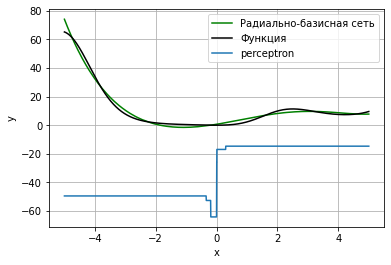

In [ ]:
plt.plot(x, predictRBF(x), "g", label="Радиально-базисная сеть")
plt.plot(x, y, "black", label="Функция")
plt.plot(x, perc.train(x, y, 1), label="perceptron")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

Задание 2

In [ ]:
# температура воздуха в Гомеле
# последний месяц
y = np.array([[6.15],[6.13],[6.17],[6.18],[6.19],[6.19],[6.20],[6.20],[6.21],[6.23],[6.24],[6.24],[6.24],[6.26],[6.30],[6.13],[6.22],[6.25],[6.25],[6.25],[6.30],[6.28],[6.29],[6.30],[6.19],[6.18],[6.18],[6.23],[6.25],[6.24],[6.19]])
x = np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10],[11],[12],[13],[14],[15],[16],[17],[18],[19],[20],[21],[22],[23],[24],[25],[26],[27],[28],[29],[30],[31]])

interpMtx = np.zeros((len(x), countOfHiddenNeuronsRBF))
centers = x[np.random.choice(len(x), countOfHiddenNeuronsRBF)]

def rbf(point, center):
    return np.exp(-np.linalg.norm((point - center) ** 2 / (2 * sigma ** 2)))

for i in range(len(x)):
    for j in range(len(centers)):
        interpMtx[i, j] = rbf(x[i], centers[j])

weightsRBF = np.linalg.pinv(interpMtx) @ y

def predictZAD2(x):
    mtx = np.zeros((len(x), countOfHiddenNeuronsRBF))
    for i in range(len(x)):
        for j in range(len(centers)):
            mtx[i, j] = rbf(x[i], centers[j])
    return mtx @ weightsRBF

In [ ]:
y = np.array([6.15,6.13,6.17,6.18,6.19,6.19,6.20,6.20,6.21,6.23,6.24,6.24,6.24,6.26,6.30,6.13,6.22,6.25,6.25,6.25,6.30,6.28,6.29,6.30,6.19,6.18,6.18,6.23,6.25,6.24,6.19])

In [ ]:
class RecurrentNeuralNetwork:
    def __init__(self, input_number, hidden_number, output_number, l_rate=0.1):
        self.l_rate = l_rate
        self.w1 = np.random.uniform(-np.sqrt(1 / input_number), np.sqrt(1 / input_number), size=[input_number, hidden_number])
        self.b1 = np.random.uniform(size=[1, hidden_number])
        self.w2 = np.random.uniform(-np.sqrt(1 / hidden_number), np.sqrt(1 / hidden_number), size=[hidden_number, hidden_number])
        self.b2 = np.random.uniform(size=[1, hidden_number])
        self.h = np.zeros(shape=[1, hidden_number])
        self.h_prev = np.zeros(shape=[1, hidden_number])
        self.w3 = np.random.uniform(-np.sqrt(1 / hidden_number), np.sqrt(1 / hidden_number), size=[hidden_number, output_number])

    def transfer(self, x):
        return np.tanh(x)

    def transfer_derivative(self, output):
        return (1 - np.tanh(output) ** 2)

    def forward_propagate(self, x):
        self.x = x
        self.h_prev = self.h
        self.h = np.dot(self.x,self.w1) + self.b1 + np.dot(self.h_prev,self.w2) + self.b2
        self.h = self.transfer(self.h)
        self.output = np.dot(self.h,self.w3)
        return self.output
    
    def backward_propagate(self, y):
        error = self.output - y
        self.dw = np.dot(self.h.T,error)
        delta = self.transfer_derivative(self.h) * np.dot(error,self.w3.T)
        self.dw_w1 = np.dot(self.x.T,delta)
        self.db_b1 = delta
        self.dw_w2 = np.dot(self.h_prev.T,delta)
        self.db_b2 = delta
        
    def update_weights(self):
        self.w1 -= self.l_rate * self.dw_w1
        self.b1 -= self.l_rate * self.db_b1
        self.w2 -= self.l_rate * self.dw_w2
        self.b2 -= self.l_rate * self.db_b2
        self.w3 -= self.l_rate * self.dw

class SlidingLayer:
    def __init__(self, n_inputs, n_output, isActivate = False):
               
        self.weight = np.random.uniform(low=-np.sqrt(1 / n_inputs), 
            high=np.sqrt(1 / n_inputs), size=[n_inputs, n_output])

        self.isActivate = isActivate

    def transfer(self, activation):
        if self.isActivate:
            return np.tanh(activation)
        return activation

    def transfer_derivative(self, output):
        if self.isActivate:
            return 1 - np.tanh(output) ** 2
        return 1

    def forward_propagate(self, x):
        self.input = x
        self.not_activated = np.dot(x,self.weight)
        self.out = self.transfer(self.not_activated)
        return self.out
    
    def backward_propagate(self, error):
        delta = error * self.transfer_derivative(self.not_activated)
        self.dw = np.dot(self.input.T,delta)
        return np.dot(delta,self.weight.T)


class SlidingPerceptron:
    def __init__(self, l_rate=0.1):
        self.l_rate = l_rate
        self.layers = []        
        self.output = 0
        
    def append_layer(self, n_inputs, n_output, isActivate = False):
        self.layers.append(SlidingLayer(n_inputs, n_output, isActivate))
    
    def forward_propagate(self, input):
        self.output = input
        for layer in self.layers:
            self.output = layer.forward_propagate(self.output)
        return self.output
    
    def backward_propagate(self, y):
        error = self.output - y
        for layer in list(reversed(self.layers)):
            error = layer.backward_propagate(error)
    
    def update_weights(self):
        for layer in self.layers:
            layer.weight -= self.l_rate * layer.dw

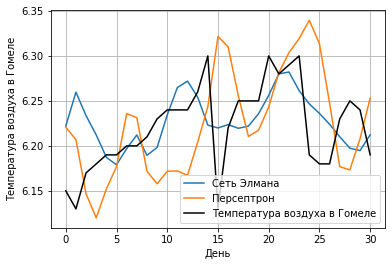

In [ ]:
class RNN:
    """
    Класс рекуррентной нейронной сети (сети Элмана)
    """
    def __init__(self, input_number, hidden_number, output_number, lr=0.01):
        """
        Конструктор класса
        input_number - число входных нейронов
        hidden_number - число нейронов на скрытом слое
        output_number - число выходных нейронов
        lr - скорость обучения
        """
        self.lr = lr

        self.w_ih = np.random.uniform(-np.sqrt(1 / input_number), np.sqrt(1 / input_number), 
            size=[input_number, hidden_number])
        self.b_ih = np.random.uniform(size=[1, hidden_number])

        self.w_hh = np.random.uniform(-np.sqrt(1 / hidden_number), np.sqrt(1 / hidden_number), 
            size=[hidden_number, hidden_number])
        self.b_hh = np.random.uniform(size=[1, hidden_number])

        self.h = np.zeros(shape=[1, hidden_number])
        self.h_t_1 = np.zeros(shape=[1, hidden_number])

        self.w = np.random.uniform(-np.sqrt(1 / hidden_number), np.sqrt(1 / hidden_number), 
            size=[hidden_number, output_number])
        
    def forward(self, x):
        """
        Функция прямого распространения
        """
        self.x = x
        self.h_t_1 = self.h
        self.h = self.x @ self.w_ih + self.b_ih + self.h_t_1 @ self.w_hh + self.b_hh
        self.h = np.tanh(self.h)
        self.out = self.h @ self.w
        return self.out
    
    def __call__(self, *args):
        """
        Перегруженная функция
        Вместо .forward(x) можно написать (x)
        """
        return self.forward(*args)
    
    def backward(self, y):
        """
        Функция обратного распространения, в которой рассчитываются градиенты
        """
        dloss = self.out - y
        self.dw = self.h.T @ dloss
        dh = dloss @ self.w.T
        grad = (1 - np.tanh(self.h) ** 2) * dh
        self.dw_ih = self.x.T @ grad
        self.db_ih = 1 * grad
        self.dw_hh = self.h_t_1.T @ grad
        self.db_hh = 1 * grad
        
    def update(self):
        """
        Функция обновления весов
        """
        self.w -= self.lr * self.dw
        self.w_ih -= self.lr * self.dw_ih
        self.b_ih -= self.lr * self.db_ih
        self.w_hh -= self.lr * self.dw_hh
        self.b_hh -= self.lr * self.db_hh

sequence_len = 20
dataset = y

mean = np.mean(dataset)
std = np.std(dataset)
rnn = RecurrentNeuralNetwork(sequence_len, 31, 1, 0.002)
perceptron = SlidingPerceptron(0.002)
perceptron.append_layer(sequence_len, 31, isActivate = True)
perceptron.append_layer(31, 1)
for epoch in range(2500):
    q = np.random.randint(0, sequence_len)
    for i in range(q, len(dataset) - sequence_len, sequence_len):
        x = (np.array(dataset[i : i+sequence_len]).reshape(1, sequence_len) - mean) / std
        y = (np.array(dataset[i+sequence_len : i+sequence_len+1]).reshape(1, 1) - mean) / std
        rnn.forward_propagate(x)
        rnn.backward_propagate(y)
        rnn.update_weights()
        perceptron.forward_propagate(x)
        perceptron.backward_propagate(y)
        perceptron.update_weights()
rnn_y = []
perceptron_y = []

for i in dataset[-sequence_len:]:
    rnn_y.append((i - mean) / std)
    perceptron_y.append((i - mean) / std)

for i in range(len(dataset)):
    out_rnn = rnn.forward_propagate(np.array(rnn_y[i:i+sequence_len]).reshape(1, sequence_len)).reshape(-1)
    out_perceptron = perceptron.forward_propagate(np.array(perceptron_y[i:i+sequence_len]).reshape(1, sequence_len)).reshape(-1)
    rnn_y.append(out_rnn[0])
    perceptron_y.append(out_perceptron[0])
    
elpred = np.array(rnn_y[sequence_len:]) * std + mean
perpred = np.array(perceptron_y[sequence_len:])* std + mean
plt.plot(elpred, label="Сеть Элмана")
plt.plot(perpred, label="Персептрон")
y = np.array([[6.15],[6.13],[6.17],[6.18],[6.19],[6.19],[6.20],[6.20],[6.21],[6.23],[6.24],[6.24],[6.24],[6.26],[6.30],[6.13],[6.22],[6.25],[6.25],[6.25],[6.30],[6.28],[6.29],[6.30],[6.19],[6.18],[6.18],[6.23],[6.25],[6.24],[6.19]])
plt.plot(y,"black", label="Температура воздуха в Гомеле")
plt.xlabel("День")
plt.ylabel("Температура воздуха в Гомеле")
plt.legend()
plt.grid()
plt.show()

In [ ]:
y = np.array([6.15,6.13,6.17,6.18,6.19,6.19,6.20,6.20,6.21,6.23,6.24,6.24,6.24,6.26,6.30,6.13,6.22,6.25,6.25,6.25,6.30,6.28,6.29,6.30,6.19,6.18,6.18,6.23,6.25,6.24,6.19])

In [ ]:
for i in range(len(perpred)):
  perpred[i] = round(perpred[i], 2)
  elpred[i] = round(elpred[i], 2)

In [ ]:
print("Персептрон: ")
print(perpred)
print("Сеть Элмана: ")
print(elpred)
print("Исходные данные: ")
print(y)

Персептрон: 
[6.22 6.21 6.15 6.12 6.15 6.18 6.24 6.23 6.17 6.16 6.17 6.17 6.17 6.2
 6.24 6.32 6.31 6.26 6.21 6.22 6.24 6.28 6.3  6.32 6.34 6.31 6.25 6.18
 6.17 6.21 6.25]
Сеть Элмана: 
[6.22 6.26 6.23 6.21 6.19 6.18 6.2  6.21 6.19 6.2  6.23 6.26 6.27 6.25
 6.22 6.22 6.22 6.22 6.22 6.24 6.26 6.28 6.28 6.26 6.25 6.24 6.22 6.21
 6.2  6.19 6.21]
Исходные данные: 
[6.15 6.13 6.17 6.18 6.19 6.19 6.2  6.2  6.21 6.23 6.24 6.24 6.24 6.26
 6.3  6.13 6.22 6.25 6.25 6.25 6.3  6.28 6.29 6.3  6.19 6.18 6.18 6.23
 6.25 6.24 6.19]


In [ ]:
perp_acc = 0
el_acc = 0

for i in range(len(perpred)):
  if abs(y[i] - perpred[i]) <= 0.05:
    perp_acc += 1
  if abs(y[i] - elpred[i]) <= 0.05:
    el_acc += 1

perp_acc /= round(len(perpred), 2)
el_acc /= round(len(elpred), 2)

In [ ]:
print("Точность на персептроне: " + str(perp_acc))
print("Точность на сети Элмана: " + str(el_acc))

Точность на персептроне: 0.41935483870967744
Точность на сети Элмана: 0.7741935483870968
